# Singal To Noise All Models
 - Calculates the singal to nosie for all models in longrunmip for GMST
 - Fraction of models stable for windows for GMST
 
 PHD-9:
 * read_and_merge_netcdfs moved from longrunmip_loader to open_ds


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
# import matplotlib.pyplot 
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import cftime
from importlib import reload
from dask.diagnostics import ProgressBar
import matplotlib.ticker as mticker
import os, sys
from glob import glob
import constants
sys.path.append(constants.MODULE_DIR)
import json
# Custom plots for signal to noise functions.
import sn_plotting as sn_plot
import open_ds
import xarray_class_accessors as xca
warnings.filterwarnings('ignore')
import open_ds
import signal_to_noise as sn
import xarray_extender as xce
import xarray_extender as xe

In [2]:
import logging, sys
logging.basicConfig(format="%(message)s", filemode='w', stream=sys.stdout)
logger = logging.getLogger()

In [3]:
# The directory where all of the longrun mip data used in this notebook is stored.
ROOT_DIR = constants.LONGRUNMIP_RETIMED_DIR
ROOT_DIR

'/g/data/w40/ab2313/PhD/longrunmip/regrid_retimestamped'

In [4]:
constants.LONGRUNMIP_RETIMED_DIR

'/g/data/w40/ab2313/PhD/longrunmip/regrid_retimestamped'

In [5]:
constants.IMAGE_SAVE_DIR_TOP_LEVEL

'/home/563/ab2313/gdata/images/PhD/top_level'

# Loading Data

In [6]:
FILE_NAME_DICT = open_ds.get_exeriment_file_names()
FILE_NAME_DICT.keys()


- Fraction of good models 0.0
------

- Fraction of good models 0.0
------

- Fraction of good models 0.0
------

- Fraction of good models 0.0
------


dict_keys(['abrupt4x_raw', 'control_raw', 'abrupt4x_loess', 'control_loess'])

In [7]:
FILE_NAME_DICT['abrupt4x_raw']

{'base_path': '/g/data/w40/ab2313/PhD/longrunmip/regrid_retimestamped',
 'file_names': ['tas_mon_GISSE2R_abrupt4x_5001_g025.nc',
  'tas_mon_MPIESM12_abrupt4x_999_g025.nc',
  'tas_mon_CNRMCM61_abrupt4x_1850_g025.nc',
  'tas_mon_CCSM3_abrupt4x_2120_g025.nc',
  'tas_ann_MPIESM11_abrupt4x_4459_g025.nc',
  'tas_mon_CESM104_abrupt4x_5900_g025.nc',
  'tas_ann_FAMOUS_abrupt4x_3000_g025.nc',
  'tas_mon_HadCM3L_abrupt4x_1000_g025.nc',
  'tas_mon_IPSLCM5A_abrupt4x_1000_g025.nc']}

In [8]:
# TO-UPDATE: This can be updated with FILE_NAME_DICT = open_ds.get_exeriment_file_names()
# This should control the getting of all file names in teh future.

abrupt4x_ds = open_ds.read_and_merge_netcdfs(FILE_NAME_DICT['abrupt4x_raw']['file_names'], 
                                             FILE_NAME_DICT['abrupt4x_raw']['base_path'],
                                             verbose=True)
abrupt4x_ds

tas_mon_GISSE2R_abrupt4x_5001_g025.nc
<xarray.DataArray 'gisse2r' (time: 5001, lat: 72, lon: 144)>
[51850368 values with dtype=float32]
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 5000-12-31 00:00:00
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
-----------
tas_mon_MPIESM12_abrupt4x_999_g025.nc
<xarray.DataArray 'mpiesm12' (time: 1000, lat: 72, lon: 144)>
[10368000 values with dtype=float32]
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 0999-12-31 00:00:00
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
-----------
tas_mon_CNRMCM61_abrupt4x_1850_g025.nc
<xarray.DataArray 'cnrmcm61' (time: 1850, lat: 72, lon: 144)>
[19180800 values with dtype=float32]
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 1849-12-31 00:00:

<xarray.Dataset>
Dimensions:   (time: 5900, lat: 72, lon: 144)
Coordinates:
  * time      (time) object 0000-12-31 00:00:00 ... 5899-12-31 00:00:00
  * lat       (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Data variables:
    gisse2r   (time, lat, lon) float32 226.4 226.3 226.3 226.1 ... nan nan nan
    mpiesm12  (time, lat, lon) float32 224.6 224.5 224.5 224.5 ... nan nan nan
    cnrmcm61  (time, lat, lon) float32 225.8 225.8 225.8 225.9 ... nan nan nan
    ccsm3     (time, lat, lon) float32 236.7 236.3 236.3 236.0 ... nan nan nan
    mpiesm11  (time, lat, lon) float32 225.2 225.2 225.3 225.3 ... nan nan nan
    cesm104   (time, lat, lon) float32 ...
    famous    (time, lat, lon) float32 226.6 226.6 226.5 226.4 ... nan nan nan
    hadcm3l   (time, lat, lon) float64 229.2 229.1 229.2 229.2 ... nan nan nan
    ipslcm5a  (time, lat, lon) float32 230.3 230.1 230.0 229.9 ... nan nan nan
Attributes:
    length:   5001

In [9]:
control_ds = open_ds.read_and_merge_netcdfs(FILE_NAME_DICT['control_raw']['file_names'], 
                                             FILE_NAME_DICT['control_raw']['base_path'])
control_ds

tas_mon_HadCM3L_control_1000_g025.nc
tas_mon_CCSM3_control_1530_g025.nc
tas_mon_GISSE2R_control_5225_g025.nc
tas_ann_MPIESM11_control_2000_g025.nc
tas_mon_IPSLCM5A_control_1000_g025.nc
 - Dropping coords ['height']
tas_mon_MPIESM12_control_1237_g025.nc
tas_ann_FAMOUS_control_3000_g025.nc
 - Dropping coords ['height']
tas_mon_CESM104_control_1000_g025.nc
tas_mon_CNRMCM61_control_2000_g025.nc
 - Dropping coords ['height']


<xarray.Dataset>
Dimensions:   (time: 5225, lon: 144, lat: 72)
Coordinates:
  * time      (time) object 0000-12-31 00:00:00 ... 5224-12-31 00:00:00
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat       (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    hadcm3l   (time, lat, lon) float64 227.3 227.3 227.5 227.6 ... nan nan nan
    ccsm3     (time, lat, lon) float32 234.3 234.0 234.0 233.6 ... nan nan nan
    gisse2r   (time, lat, lon) float32 ...
    mpiesm11  (time, lat, lon) float32 224.7 224.7 224.6 224.6 ... nan nan nan
    ipslcm5a  (time, lat, lon) float32 227.2 227.1 227.0 226.9 ... nan nan nan
    mpiesm12  (time, lat, lon) float32 224.4 224.4 224.4 224.4 ... nan nan nan
    famous    (time, lat, lon) float32 224.5 224.4 224.4 224.3 ... nan nan nan
    cesm104   (time, lat, lon) float32 227.5 227.4 227.3 227.3 ... nan nan nan
    cnrmcm61  (time, lat, lon) float32 224.1 224.1 224.1 224.2 ... nan nan nan
Attributes:
    length:   1000

In [10]:
with open('data/longrunmip_model_lengths.json') as f:
    longrunmip_model_lengths = json.loads(f.read())

In [11]:
good_model_list = list(longrunmip_model_lengths['good_models'])
good_model_list

['ccsm3',
 'cesm104',
 'cnrmcm61',
 'famous',
 'gisse2r',
 'hadcm3l',
 'ipslcm5a',
 'mpiesm11',
 'mpiesm12']

In [12]:
abrupt4x_ds = abrupt4x_ds[good_model_list]
control_ds = control_ds[good_model_list]

In [13]:
models = list(abrupt4x_ds.data_vars)
models

['ccsm3',
 'cesm104',
 'cnrmcm61',
 'famous',
 'gisse2r',
 'hadcm3l',
 'ipslcm5a',
 'mpiesm11',
 'mpiesm12']

# Calculations

In [26]:
# Control space mean
control_ds_mean = control_ds.clima_ds.space_mean()
control_ds_mean

<xarray.Dataset>
Dimensions:   (time: 5225)
Coordinates:
  * time      (time) object 0000-12-31 00:00:00 ... 5224-12-31 00:00:00
Data variables:
    ccsm3     (time) float64 287.3 287.2 286.9 286.7 286.6 ... nan nan nan nan
    cesm104   (time) float64 286.7 286.6 286.6 286.8 286.9 ... nan nan nan nan
    cnrmcm61  (time) float64 286.2 286.1 286.1 286.0 286.0 ... nan nan nan nan
    famous    (time) float64 287.6 287.5 287.5 287.6 287.7 ... nan nan nan nan
    gisse2r   (time) float64 287.6 287.5 287.5 287.6 ... 287.4 287.5 287.5 287.5
    hadcm3l   (time) float64 287.6 287.4 287.2 287.2 287.5 ... nan nan nan nan
    ipslcm5a  (time) float64 285.1 285.1 285.2 285.4 285.2 ... nan nan nan nan
    mpiesm11  (time) float64 286.6 286.6 286.8 286.9 286.7 ... nan nan nan nan
    mpiesm12  (time) float64 287.1 287.0 287.0 287.1 286.9 ... nan nan nan nan

In [27]:
# Calculating the anomalies
abrupt4x_anom = abrupt4x_ds.clima_ds.anomalies(control_ds)
# Space mean of anomalies
abrupt4x_mean = abrupt4x_anom.clima_ds.space_mean()
abrupt4x_mean = abrupt4x_mean.compute()

ccsm3, Using historical dataset
cesm104, Using historical dataset
cnrmcm61, Using historical dataset
famous, Using historical dataset
gisse2r, Using historical dataset
hadcm3l, Using historical dataset
ipslcm5a, Using historical dataset
mpiesm11, Using historical dataset
mpiesm12, Using historical dataset


In [30]:
RUN_PARAMS = dict(end_window = 370)
RUN_PARAMS['end_window']

370

In [31]:
reload(xca)
stable_sn_ds, unstable_sn_ds =\
                                abrupt4x_mean.sn_ds.sn_multiwindow(control_ds_mean,
                                                     end_window=RUN_PARAMS['end_window'], step_window=2)


ccsm3
Starting window loop from 20 to 370 with step size of 2
20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 
cesm104
Starting window loop from 20 to 370 with step size of 2
20, 22, 24, 26, 28, 30, 32, 34, 36, 3

In [32]:
# Counting the number of models present at each time step.
reload(sn)
number_models_present = sn.count_over_data_vars(abrupt4x_mean, list(unstable_sn_ds.data_vars), dim='model')

In [33]:
# The number of models stable at each timestep
unstable_number_da = sn.number_finite(unstable_sn_ds)
stable_number_da = sn.number_finite(stable_sn_ds)
unstable_number_da

<xarray.DataArray (window: 175, time: 5882)>
array([[0, 8, 9, ..., 0, 0, 0],
       [0, 8, 9, ..., 0, 0, 0],
       [0, 8, 9, ..., 0, 0, 0],
       ...,
       [0, 9, 9, ..., 0, 0, 0],
       [0, 9, 9, ..., 0, 0, 0],
       [0, 9, 9, ..., 0, 0, 0]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 5875 5876 5877 5878 5879 5880 5881
  * window   (window) int64 20 22 24 26 28 30 32 ... 356 358 360 362 364 366 368

# Plots

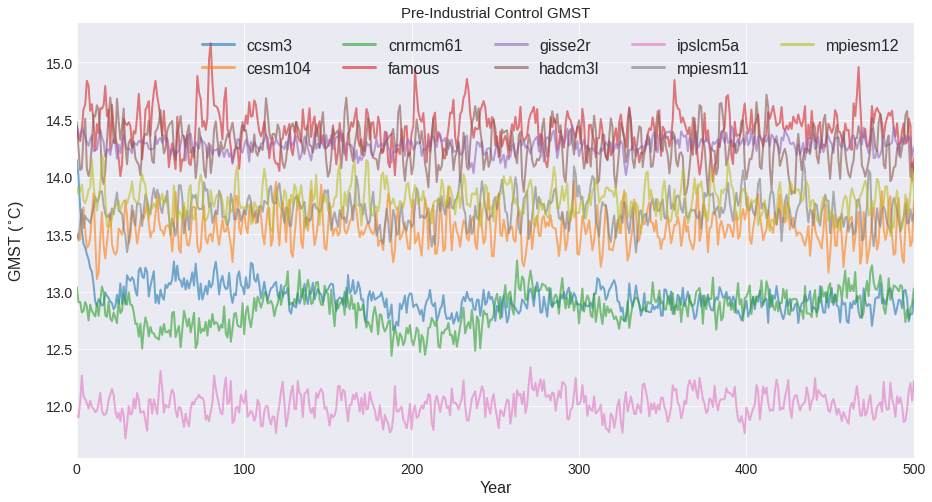

In [34]:

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(15,8))

time = control_ds_mean['time'].values
years = [t.year for t in time]
for var in list(control_ds_mean.data_vars):

    plot_kwargs = dict(alpha = 0.6,linewidth = 2)
        
    ax.plot(years, control_ds_mean[var].values - 273.15, label=var, **plot_kwargs)
    
ax.set_ylabel(r'GMST ($^{\circ}$C)', size=16, labelpad=20)
ax.set_xlabel('Year', size=16)
ax.set_xlim(years[0], years[500])
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
leg = ax.legend(ncol = 5, fontsize=16)
[line.set_linewidth(3) for line in leg.get_lines()];
ax.set_title('Pre-Industrial Control GMST', fontsize=15);

# fig.savefig(os.path.join(IMG_DIR, '04_multi_model_control_good_models_t500_year_axis.png'), bbox_inches='tight')

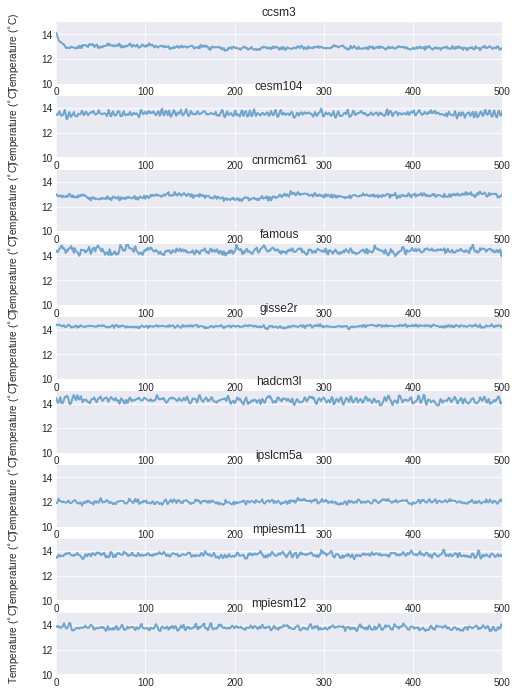

In [35]:

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(8,12))

time = control_ds_mean['time'].values
years = [t.year for t in time]
dvars = list(control_ds_mean.data_vars)
for i,var in enumerate(dvars):
    
    ax = fig.add_subplot(len(dvars), 1, i + 1)

    ax.plot(years, control_ds_mean[var].values - 273.15, label=var, alpha = 0.6,linewidth = 2)
    ax.set_xlim(years[0], years[500])
    ax.set_ylim([10, 15])
    ax.set_title(var)

    ax.set_ylabel(r'Temperature ($^{\circ}$C)', labelpad=20)

# fig.savefig(os.path.join(IMG_DIR, '04_multi_model_control_good_models_t500_year_axis_split_model.png'), bbox_inches='tight')

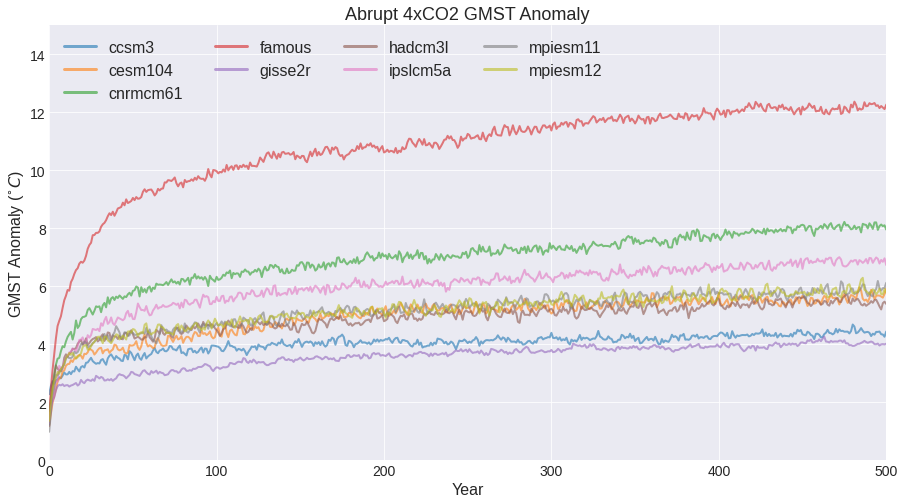

In [36]:
plt.style.use('seaborn-darkgrid')

data = abrupt4x_mean.where(abrupt4x_mean.time.dt.year < 13500, drop = True)

fig, ax = plt.subplots(figsize=(15,8))


# time = data['time'].values
for var in list(data.data_vars):
    
    # Removing nans from data
    da = data[var].dropna(dim='time')
    time = da.time.values
    years = [t.year for t in time]

    values = da.values
    
    line_kwargs = dict(alpha = 0.6,linewidth = 2)
    
    ax.plot(years, values, label=var, **line_kwargs)
    c = plt.gca().lines[-1].get_color()
#     ax.annotate(var, xy = (time[-1], values[-1]), color=c, zorder=1000, size=12)

ax.set_ylabel(r'GMST Anomaly ($^{\circ}C$)', size=16);
ax.set_xlabel('Year', size=16);
ax.set_title('Abrupt 4xCO2 GMST Anomaly', fontsize=18);
ax.set_ylim([0,15]);
ax.set_xlim(years[0], years[500])
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
leg = ax.legend(ncol=4, fontsize = 16);
[line.set_linewidth(3) for line in leg.get_lines()];
# fig.savefig(os.path.join(IMG_DIR, '04_good_models_mean_t500_year_axis.png'))

### Fraction of Models Stable

{'height': 15, 'width': 12, 'hspace': 0.3, 'vmin': 0, 'vmax': 10, 'step': 1, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x7f452c36d880>, 'line_color': 'limegreen', 'line_alpha': 0.5, 'cbar_label': 'Number of Unstable Models', 'cbartick_offset': 0.5, 'title': 'All Models', 'label_size': 12, 'extend': 'neither', 'xlowerlim': None, 'xupperlim': 500, 'hieght': 15, 'cbar_ncols': 5, 'filter_max': True, 'levels': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'cbar_xticklabels': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'cbar_ticks': array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])}


locator: <matplotlib.ticker.FixedLocator object at 0x7f452ca6beb0>
cbar x-tick labels = [0 1 2 3 4 5 6 7 8 9]
['ccsm3', 'cesm104', 'cnrmcm61', 'famous', 'gisse2r', 'hadcm3l', 'ipslcm5a', 'mpiesm11', 'mpiesm12']
0 1 2 3 4 5 6 7 8 

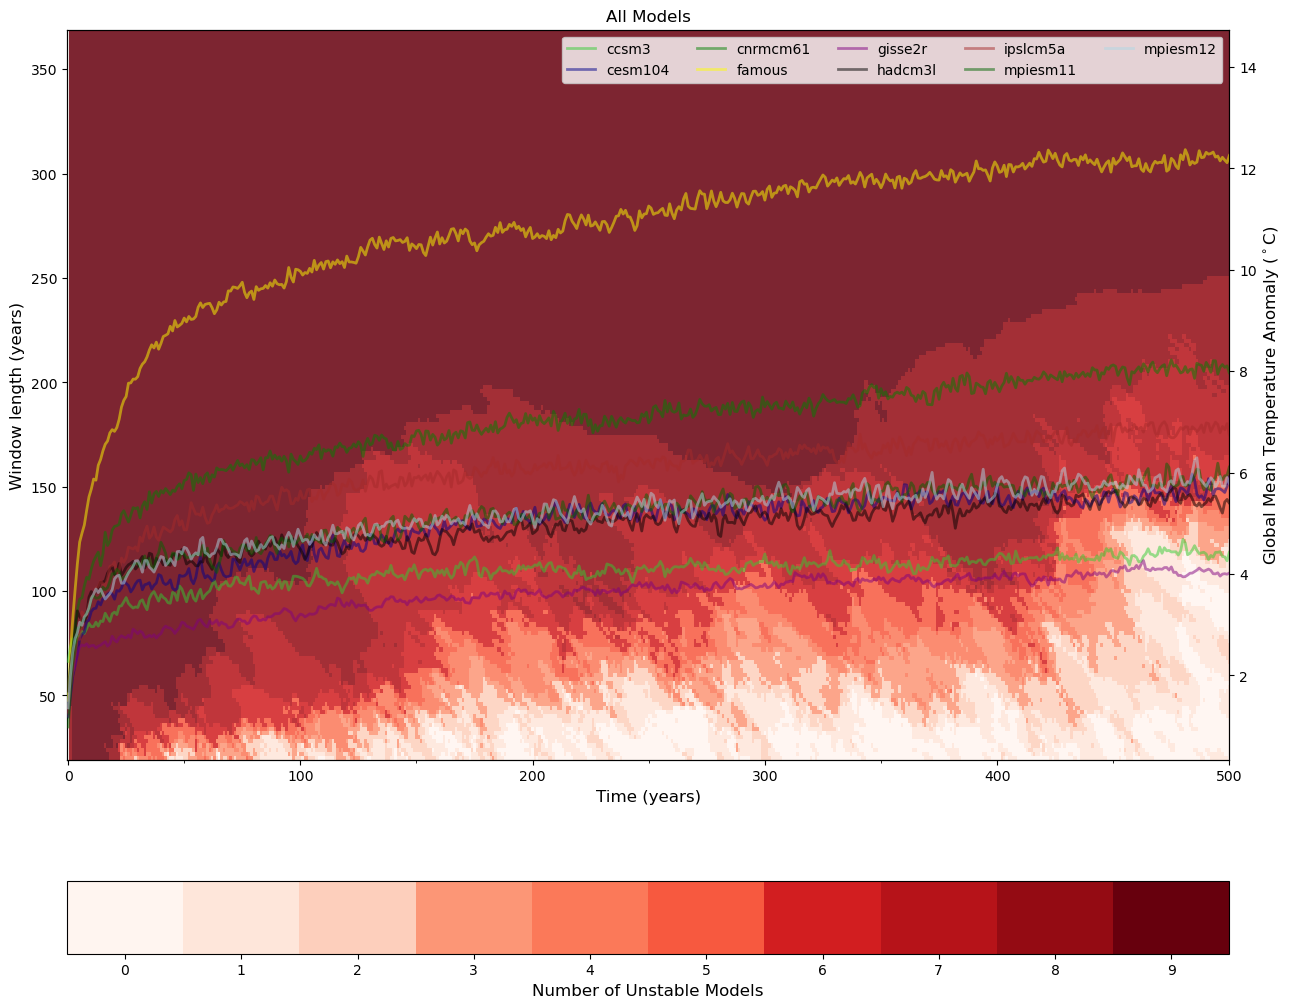

In [44]:
reload(sn_plot)
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax1, ax2, ax3,cbar = sn_plot.sn_multi_window_in_time(
    unstable_number_da, stable_number_da, abrupt4x_mean, 
    logginglevel='DEBUG', 
    hieght = 15, width = 12,
    vmin=0, vmax=10, step=1, cbartick_offset = 0.5,
    cmap='Reds',
    extend='neither', xupperlim = 500,
    cbar_label= 'Number of Unstable Models', 
    title = f'All Models', cbar_ncols = 5, filter_max=True)

# fig.savefig(f'{IMG_DIR}/04_all_model_SN_multi_window_long_models_number_unstable', dpi=200, bbox_inches='tight')